# Information

This notebook was written by Bennet Juhls (bjuhls@awi.de) 
for the manuscript <br><strong>"Serpentine ice channels and their interaction with riverbed permafrost 
in the Lena River Delta, Russia".</strong><br>
Its using plotting data from 3 different sites and using input from:
1. In QGIS extracted Remote Sensing data (optical and radar) - /2_RS - <strong>(contact: B. Juhls, S. Antonova)</strong>
2. Geoelectrical (ERT) data - /3_ERT - <strong>(contact: M. Angelopolous, P. Overduin, N. Bobrov)</strong>
3. 2D thermal numerical model data - /4_MODEL - <strong> (contact: F. Miesner, M. Langer)</strong><br><br>

Berlin, 2021-03-12

# Python imports, reader, and functions

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')



def readERT(path, profilename):
    #path = path to /3_ERT
    #profilename = e.g. "1_A"
    print(os.path.join(path, profilename + "_ERT_Distance.csv"))
    DistanceArr = np.genfromtxt(os.path.join(path, profilename + "_ERT_Distance.csv"), delimiter= "," ,skip_header=0)
    DepthArr = np.genfromtxt(os.path.join(path, profilename + "_ERT_Depths.csv"), delimiter= "," ,skip_header=0)
    ResistivityArr = np.genfromtxt(os.path.join(path, profilename + "_ERT_Resistivity.csv"), delimiter= "," ,skip_header=0)
    DistanceList = list(zip(*np.genfromtxt(os.path.join(path, profilename + "_ERT_Waterdepth.csv"), delimiter= "," ,skip_header=1)))[0]
    WaterdepthList = list(zip(*np.genfromtxt(os.path.join(path, profilename + "_ERT_Waterdepth.csv"), delimiter= "," ,skip_header=1)))[1]
    outERT = [DistanceArr, DepthArr, ResistivityArr, DistanceList, WaterdepthList]
    return outERT

def readRS(path, profilename):
    #path = path to /2_RS/Extraction
    #profilename = e.g. "1_A"
    Distance_Radar= list(zip(*np.genfromtxt(os.path.join(path, profilename + "_Radar.csv"), delimiter= "," ,skip_header=1)))[0]
    Refl_Radar = list(zip(*np.genfromtxt(os.path.join(path, profilename + "_Radar.csv"), delimiter= "," ,skip_header=1)))[3]
    try:
        Distance_Optical = list(zip(*np.genfromtxt(os.path.join(path, profilename + "_Optical.csv"), delimiter= "," ,skip_header=1)))[0]
        Refl_Optical = list(zip(*np.genfromtxt(os.path.join(path, profilename + "_Optical.csv"), delimiter= "," ,skip_header=1)))[3]
    except:
        print("RS has no optical data, filling both arrays with radar")
        Distance_Optical = Distance_Radar
        Refl_Optical = Refl_Radar
        pass
        #Distance_Optical = np.linspace(0, np.max(Distance_Optical), len(Distance_Optical))
        #Refl_Optical = np.linspace(np.nan, np.nan, len(Distance_Optical))
    outRS = [Distance_Optical, Refl_Optical, Distance_Radar, Refl_Radar]
    return outRS

def readMODEL(path, profilename):
    #path = path to /4_Model
    #profilename = e.g. "ECR_1_7"  ## = 1A
    Model_in = pd.read_csv(os.path.join(path, profilename + "_7.0dt_2000.0years_steadystate_init_0.00maxSnow_Horz_Vert_WaterDepth_T_Water.csv"), sep="\t")
    Dim = len(np.where(Model_in["horz distance "]-np.roll(Model_in["horz distance "],1)!=0)[0])
    print(Dim)
    splitted_dist = np.array_split(Model_in["horz distance "], Dim)
    DistanceArr = np.array(splitted_dist).transpose()
    splitted_depth = np.array_split(Model_in[" depth "], Dim)
    DepthArr = np.array(splitted_depth).transpose()
    splitted_temp = np.array_split(Model_in[" temperature "], Dim)
    TempArr = np.array(splitted_temp).transpose()
    outModel = [DistanceArr, DepthArr, TempArr]
    return outModel


#### define paths ####
PathERT = "/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/SerpChan/_data/3_ERT/cropped/"
PathRS = "/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/SerpChan/_data/2_RS/Extraction/"
PathModel = "/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/SerpChan/_data/4_Model/v_20210318/"

PathFigExport = "/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/SerpChan/_figures/ProfilePlots/"

# Profile 1A

In [59]:
ERT = readERT(PathERT, "1_A")
RS = readRS(PathRS, "1_A")
Model = readMODEL(PathModel, "ECR_1")

f, (( ax0, ax1, ax2 )) = plt.subplots(3, 1,figsize=(13,11), dpi=300,sharex =True)

### Optical RS ###
ax0.set_title("Remote Sensing", fontsize=22)
ax0.plot(RS[0],np.array(RS[1])/10000, "k-", label="Optical")
ax0.plot(-10000, 0.3, "k.--", label="Radar")
ax0.set_ylabel("Optical Reflectance", c= "k", fontsize=17)
ax0.set_xticks([])
ax0.tick_params(axis='both', which='major', labelsize=17)
ax0.legend(loc=2, fontsize=20)
#ax0.text(0, np.nanmax(np.array(RS[1])/10000)+0.05, "A", fontsize=30)
#ax0.text(1750-35, np.nanmax(np.array(RS[1])/10000)+0.05, "A'", fontsize=30)
ax0.set_ylim(0,np.nanmax(np.array(RS[1])/10000) + (np.nanmax(np.array(RS[1])/10000)*0.1))
### Radar RS ###
ax0a = ax0.twinx()
ax0a.plot(RS[2],RS[3], "k.--", label="Radar")
ax0a.set_ylabel("Radar Backscatter", c= "k", fontsize=17)
ax0a.tick_params(axis='both', which='major', labelsize=17)

### Bathymetry Line ####
#ax0b = ax0.twinx()
#ax0b.plot(d_row[0], bathy, "k-")



####### ERT #######
ax1.set_title("ERT", fontsize=22)
cmap = mpl.cm.PuOr

min_v= np.log(1)
max_v= np.log(5000)
levels= np.linspace(min_v,max_v,100)

pcm = ax1.contourf(ERT[0], ERT[1], np.log(ERT[2]),
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')
cbaxes = f.add_axes([0.89, 0.4, 0.025, 0.21])
cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=np.linspace(min_v, max_v, 5) )#ticks=ticks
cb.ax.set_yticklabels([str(int(round(np.exp(x), 0))) for x in np.linspace(min_v, max_v, 5)], fontsize=17)
cb.set_label("Resistivity (\u03A9m)", fontsize=17)

ax1.plot(ERT[3], ERT[4], "k-", lw=2)
ax1.fill_between(ERT[3], [0 for i in ERT[3]], ERT[4], "grey")

ax1.set_xlim(-20,1800)
ax1.invert_yaxis()
ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.set_xticks([])
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel("Depth (m)", c= "k", fontsize=17)


######## MODEL ######
ax2.set_title("Model", fontsize=22)
min_v= -4.
max_v= 4.
levels= np.linspace(min_v,max_v,100)
cmap = mpl.cm.PuOr_r

pcm = ax2.contourf(Model[0], Model[1], Model[2],
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')

cbaxes = f.add_axes([0.89, 0.1, 0.025, 0.21]) 

cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=[-4, -2, 0, 2, 4] )
cb.ax.set_yticklabels([ -4, -2, 0, 2, 4], fontsize=17)
cb.set_label("Temperature ($^\circ$C)", fontsize=17)

ax2.plot(ERT[3], ERT[4], "k-", lw=2)
ax2.fill_between(ERT[3], [0 for i in ERT[3]], ERT[4], "grey")

ax2.set_xlabel("Distance (m)", fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.invert_yaxis()
ax2.set_ylim(np.nanmax(ERT[1]), 0)
ax2.invert_xaxis()

lenght = 1750
spcing = lenght / 250 + 1

#ax2.set_xlim(850,0)
ax2.set_xlim(0, lenght)
ax2.xaxis.set_ticks(np.linspace(lenght, 0, int(spcing)))
ax2.xaxis.set_ticks(np.linspace(0, lenght,  int(spcing)))
ax2.set_xticklabels(list(map(int, np.linspace(0, lenght, int(spcing)))))
##############################################


plt.gcf().subplots_adjust(left=0.07, right=0.88, bottom=0.08, top = 0.93)
plt.savefig(PathFigExport + "Profile_1A.png", dpi=300)

plt.show()

/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/SerpChan/_data/3_ERT/cropped/1_A_ERT_Distance.csv
347


# Profile 1B

/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/SerpChan/_data/3_ERT/cropped/1_B_ERT_Distance.csv
108


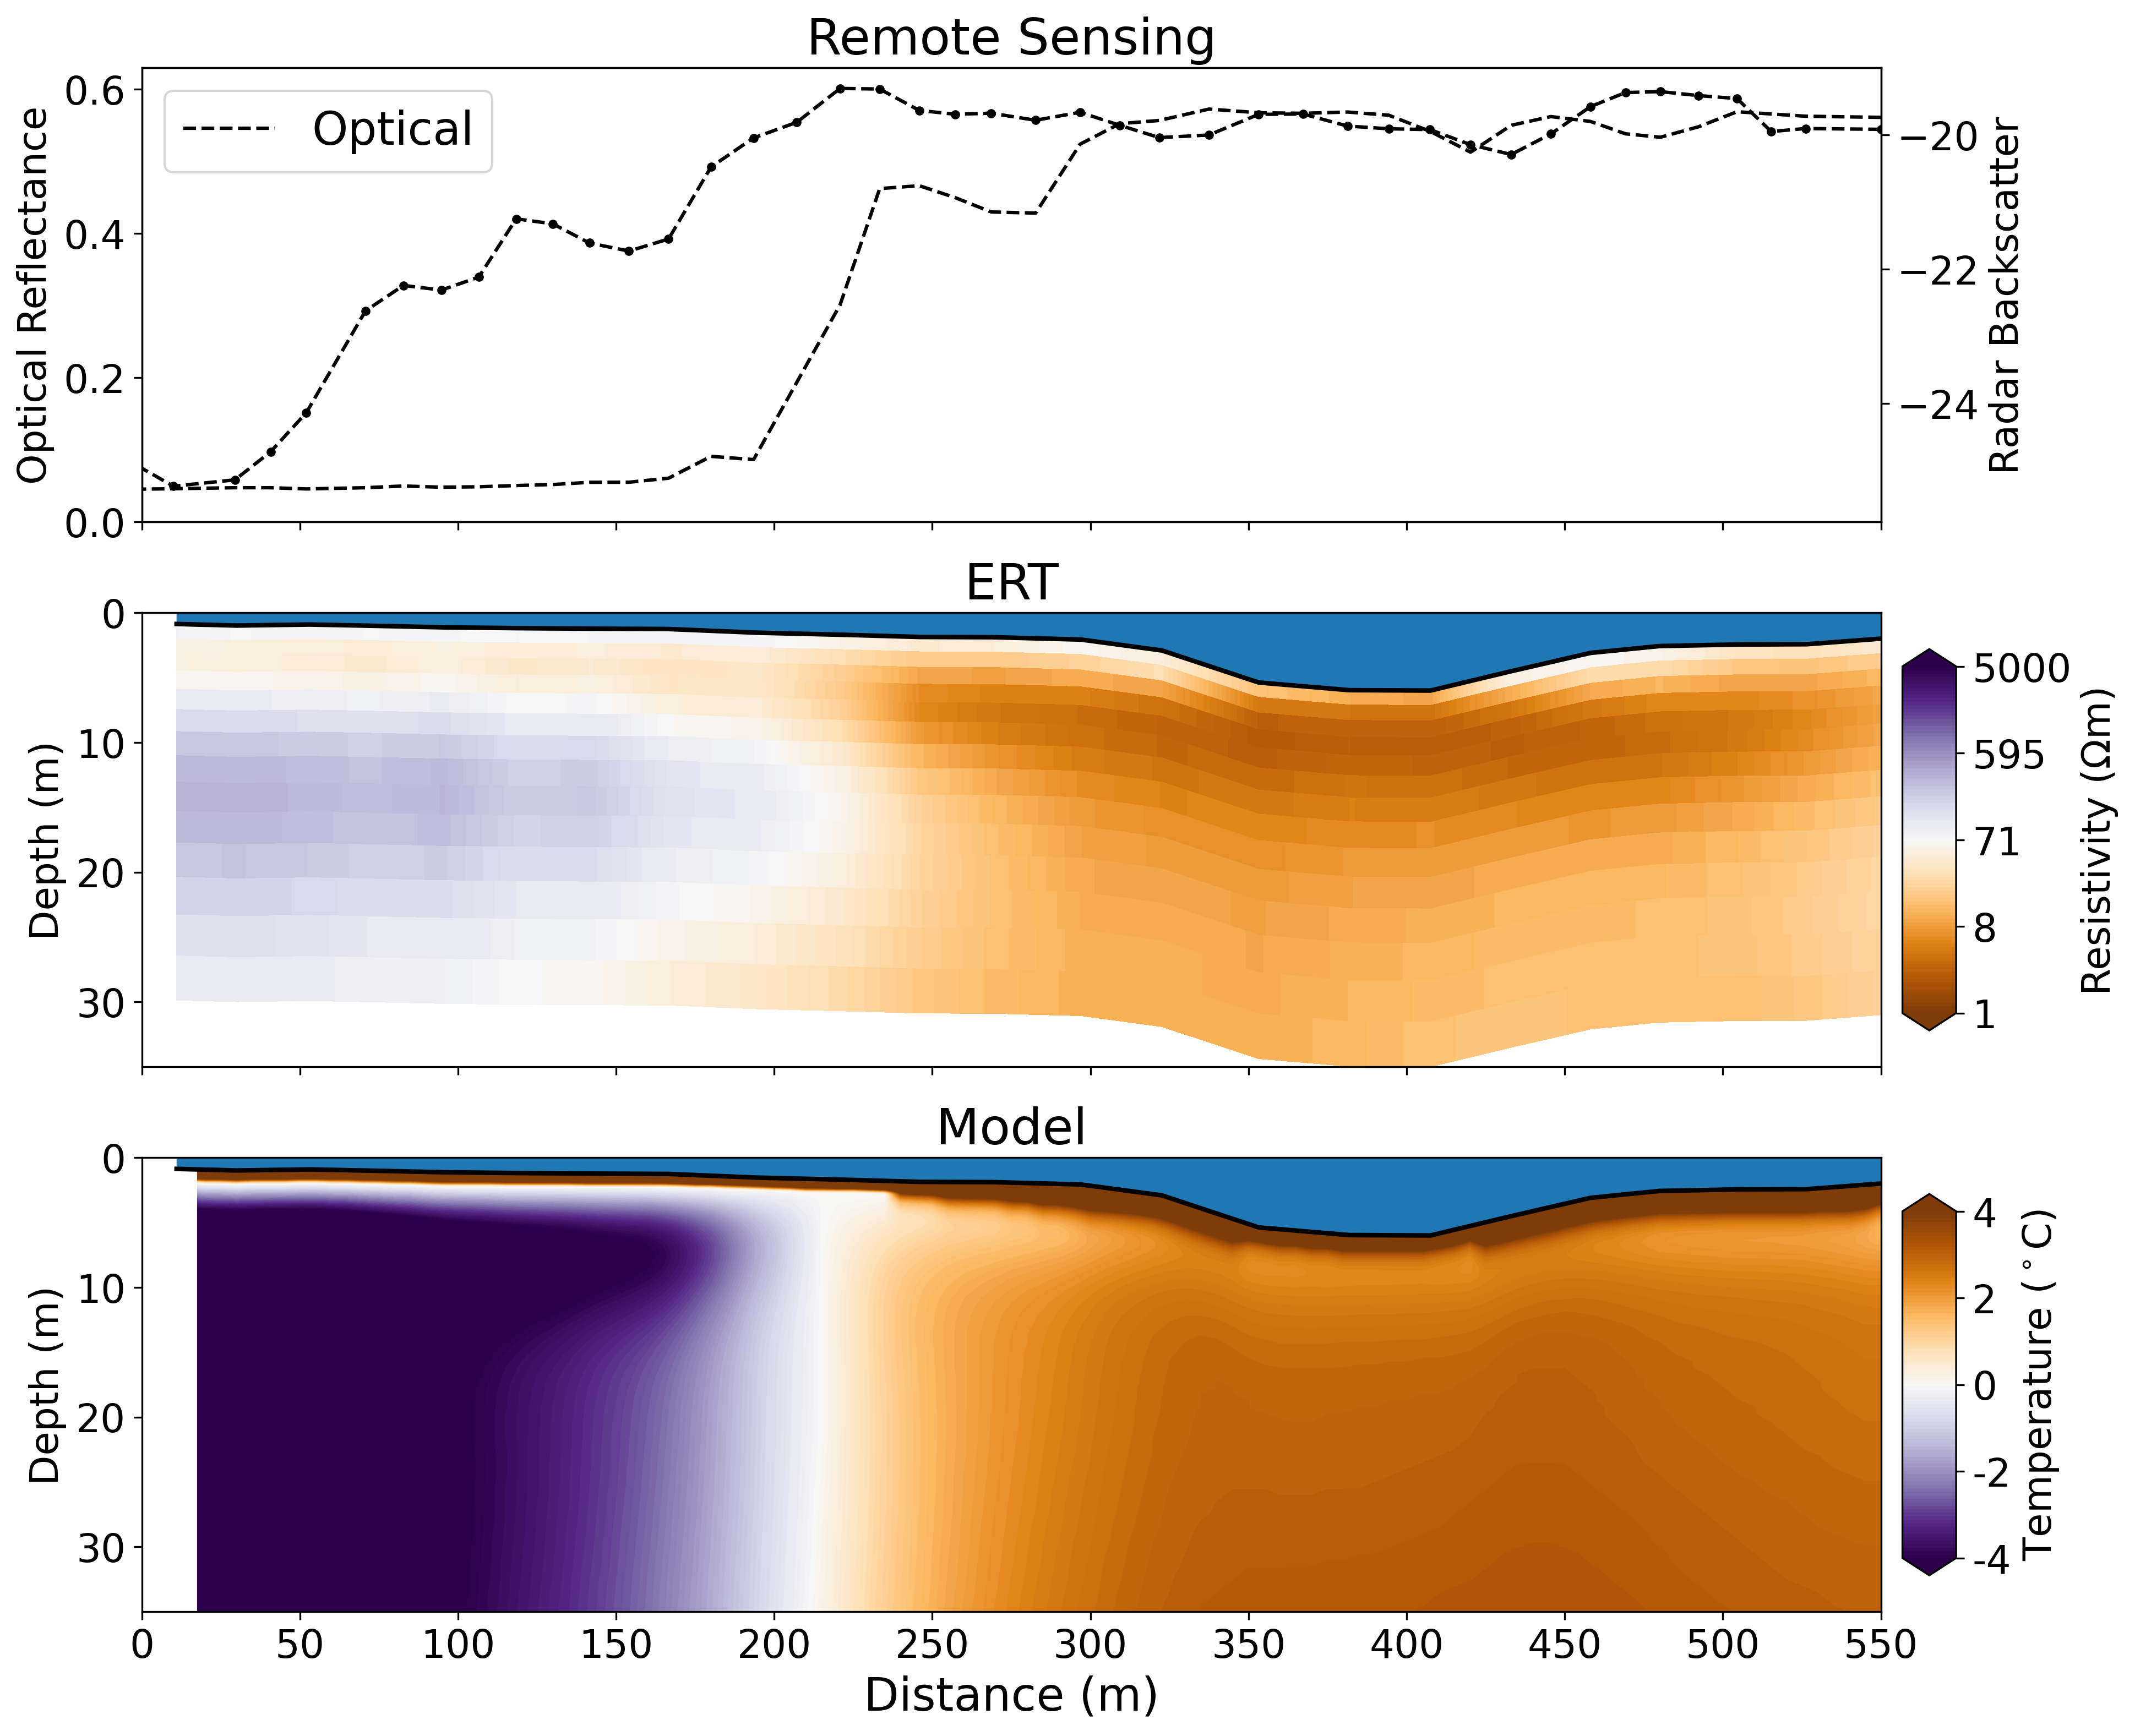

In [60]:
ERT = readERT(PathERT, "1_B")
RS = readRS(PathRS, "1_B")
Model = readMODEL(PathModel, "ECR_2")

f, (( ax0, ax1, ax2 )) = plt.subplots(3, 1,figsize=(13,11), dpi=300,sharex =True)

### Optical RS ###
ax0.set_title("Remote Sensing", fontsize=22)
ax0.plot(RS[0],np.array(RS[1])/10000, "k--", label="Optical")
#ax0.plot(-10000, 0.3, "k.--", label="Radar")
ax0.set_ylabel("Optical Reflectance", c= "k", fontsize=17)
ax0.set_xticks([])
ax0.tick_params(axis='both', which='major', labelsize=17)
ax0.legend(loc=2, fontsize=20)
ax0.set_ylim(0,np.nanmax(np.array(RS[1])/10000) + (np.nanmax(np.array(RS[1])/10000)*0.1))
#ax0.text(-100, np.nanmax(np.array(RS[1])/10000)+0.05, "B'", fontsize=30)
#ax0.text(550-55, np.nanmax(np.array(RS[1])/10000)+0.05, "B", fontsize=30)

### Radar RS ###
ax0a = ax0.twinx()
ax0a.plot(RS[2],RS[3], "k.--", label="Radar")
ax0a.set_ylabel("Radar Backscatter", c= "k", fontsize=17)
ax0a.tick_params(axis='both', which='major', labelsize=17)
ax0.invert_xaxis()

### Bathymetry Line ####
#ax0b = ax0.twinx()
#ax0b.plot(d_row[0], bathy, "k-")



####### ERT #######
ax1.set_title("ERT", fontsize=22)
cmap = mpl.cm.PuOr

min_v= np.log(1)
max_v= np.log(5000)
levels= np.linspace(min_v,max_v,100)

pcm = ax1.contourf(ERT[0], ERT[1], np.log(ERT[2]),
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')
cbaxes = f.add_axes([0.89, 0.4, 0.025, 0.21])
cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=np.linspace(min_v, max_v, 5) )#ticks=ticks
cb.ax.set_yticklabels([str(int(round(np.exp(x), 0))) for x in np.linspace(min_v, max_v, 5)], fontsize=17)
cb.set_label("Resistivity (\u03A9m)", fontsize=17)

ax1.plot(ERT[3], ERT[4], "k-", lw=2)
ax1.fill_between(ERT[3], [0 for i in ERT[3]], ERT[4], "grey")

#ax1.set_xlim(-20,1800)
ax1.invert_yaxis()
ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.set_xticks([])
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax1.invert_xaxis()

######## MODEL ######
ax2.set_title("Model", fontsize=22)
min_v= -4.
max_v= 4.
levels= np.linspace(min_v,max_v,100)
cmap = mpl.cm.PuOr_r

pcm = ax2.contourf(Model[0], Model[1], Model[2],
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')

cbaxes = f.add_axes([0.89, 0.1, 0.025, 0.21]) 

cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=[-4, -2, 0, 2, 4] )
cb.ax.set_yticklabels([ -4, -2, 0, 2, 4], fontsize=17)
cb.set_label("Temperature ($^\circ$C)", fontsize=17)

ax2.plot(ERT[3], ERT[4], "k-", lw=2)
ax2.fill_between(ERT[3], [0 for i in ERT[3]], ERT[4], "grey")

ax2.set_xlabel("Distance (m)", fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.invert_yaxis()
ax2.set_ylim(np.nanmax(ERT[1]), 0)
ax2.invert_xaxis()

lenght = 550
spcing = lenght / 50 + 1

ax2.set_xlim(lenght,0)
#ax2.set_xlim(0, lenght)
ax2.xaxis.set_ticks(np.linspace(lenght, 0, int(spcing)))
#ax2.xaxis.set_ticks(np.linspace(0, lenght,  int(spcing)))
ax2.set_xticklabels(list(map(int, np.linspace(0, lenght, int(spcing)))))

##############################################

plt.gcf().subplots_adjust(left=0.07, right=0.88, bottom=0.08, top = 0.93)
plt.savefig(PathFigExport + "Profile_1B.png", dpi=300)

plt.show()

# Profile 2A

In [91]:
ERT = readERT(PathERT, "2_A")
RS = readRS(PathRS, "2_A")
Model = readMODEL(PathModel, "ECR_3")

f, (( ax0, ax1, ax2 )) = plt.subplots(3, 1,figsize=(13,11), dpi=300,sharex =True)

### Optical RS ###
ax0.set_title("Remote Sensing", fontsize=22)
ax0.plot(RS[0][::-1],np.array(RS[1])/10000, "k--", label="Optical")
ax0.plot(-10000, 0.3, "k.--", label="Radar")
ax0.set_ylabel("Optical Reflectance", c= "k", fontsize=17)
ax0.set_xticks([])
ax0.tick_params(axis='both', which='major', labelsize=17)
ax0.legend(loc=1, fontsize=20)
ax0.set_ylim(0,np.nanmax(np.array(RS[1])/10000) + (np.nanmax(np.array(RS[1])/10000)*0.1))
#ax0.text(0, np.nanmax(np.array(RS[1])/10000)+0.05, "A", fontsize=30)
#ax0.invert_xaxis()
#ax0.text(1750-35, np.nanmax(np.array(RS[1])/10000)+0.05, "A'", fontsize=30)

### Radar RS ###
ax0a = ax0.twinx()
ax0a.plot(RS[2][::-1],RS[3], "k.--", label="Radar")
ax0a.set_ylabel("Radar Backscatter", c= "k", fontsize=17)
ax0a.tick_params(axis='both', which='major', labelsize=17)
ax0a.invert_xaxis()

### Bathymetry Line ####
#ax0b = ax0.twinx()
#ax0b.plot(d_row[0], bathy, "k-")



####### ERT #######
ax1.set_title("ERT", fontsize=22)
cmap = mpl.cm.PuOr

min_v= np.log(1)
max_v= np.log(5000)
levels= np.linspace(min_v,max_v,100)

pcm = ax1.contourf(ERT[0], ERT[1], np.log(ERT[2]),
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')
cbaxes = f.add_axes([0.89, 0.4, 0.025, 0.21])
cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=np.linspace(min_v, max_v, 5) )#ticks=ticks
cb.ax.set_yticklabels([str(int(round(np.exp(x), 0))) for x in np.linspace(min_v, max_v, 5)], fontsize=17)
cb.set_label("Resistivity (\u03A9m)", fontsize=17)

ax1.plot(ERT[3], ERT[4], "k-", lw=2)
ax1.fill_between(ERT[3], [0 for i in ERT[3]], ERT[4], "grey")

#ax1.set_xlim(-20,1800)
#ax1.invert_yaxis()
ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.set_xticks([])
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax1.invert_xaxis()



######## MODEL ######
ax2.set_title("Model", fontsize=22)
min_v= -4.
max_v= 4.
levels= np.linspace(min_v,max_v,100)
cmap = mpl.cm.PuOr_r

pcm = ax2.contourf(Model[0], Model[1], Model[2],
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')

cbaxes = f.add_axes([0.89, 0.1, 0.025, 0.21]) 

cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=[-4, -2, 0, 2, 4] )
cb.ax.set_yticklabels([ -4, -2, 0, 2, 4], fontsize=17)
cb.set_label("Temperature ($^\circ$C)", fontsize=17)

ax2.plot(ERT[3], np.array(ERT[4])*-1, "k-", lw=2)
ax2.fill_between(ERT[3], [0 for i in ERT[3]], np.array(ERT[4])*-1, "grey")

ax2.set_xlabel("Distance (m)", fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.invert_yaxis()
#ax2.set_ylim(np.nanmax(ERT[1]), 0)
ax2.set_ylim(np.nanmin(ERT[1])*-1, 0)
ax2.invert_xaxis()

lenght = 900
spcing = lenght / 100 + 1
ax2.set_xlim(900,0)
ax2.xaxis.set_ticks(np.linspace(lenght, 0, int(spcing)))
ax2.set_xticklabels(list(map(int, np.linspace(0, lenght, int(spcing)))))

##############################################

plt.gcf().subplots_adjust(left=0.07, right=0.88, bottom=0.08, top = 0.93)
plt.savefig(PathFigExport + "Profile_2A.png", dpi=300)

plt.show()

/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/SerpChan/_data/3_ERT/cropped/2_A_ERT_Distance.csv
174


# Profile 2B

In [66]:
ERT = readERT(PathERT, "2_B")
RS = readRS(PathRS, "2_B")
Model = readMODEL(PathModel, "ECR_4")

f, (( ax0, ax1, ax2 )) = plt.subplots(3, 1,figsize=(13,11), dpi=300,sharex =True)

### Optical RS ###
ax0.set_title("Remote Sensing", fontsize=22)
ax0.plot(np.array(RS[0][::])+120,np.array(RS[1])/10000, "k--", label="Optical")
ax0.plot(-10000, 0.3, "k.--", label="Radar")
ax0.set_ylabel("Optical Reflectance", c= "k", fontsize=17)
ax0.set_xticks([])
ax0.tick_params(axis='both', which='major', labelsize=17)
ax0.legend(loc=1, fontsize=20)
ax0.set_ylim(0,np.nanmax(np.array(RS[1])/10000) + (np.nanmax(np.array(RS[1])/10000)*0.1))
#ax0.text(0, np.nanmax(np.array(RS[1])/10000)+0.05, "A", fontsize=30)
#ax0.invert_xaxis()
#ax0.text(1750-35, np.nanmax(np.array(RS[1])/10000)+0.05, "A'", fontsize=30)

### Radar RS ###
ax0a = ax0.twinx()
ax0a.plot(np.array(RS[2][::])+120,RS[3], "k.--", label="Radar")
ax0a.set_ylabel("Radar Backscatter", c= "k", fontsize=17)
ax0a.tick_params(axis='both', which='major', labelsize=17)
ax0a.invert_xaxis()

### Bathymetry Line ####
#ax0b = ax0.twinx()
#ax0b.plot(d_row[0], bathy, "k-")



####### ERT #######
ax1.set_title("ERT", fontsize=22)
cmap = mpl.cm.PuOr

min_v= np.log(1)
max_v= np.log(5000)
levels= np.linspace(min_v,max_v,100)

pcm = ax1.contourf(ERT[0], ERT[1], np.log(ERT[2]),
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')
cbaxes = f.add_axes([0.89, 0.4, 0.025, 0.21])
cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=np.linspace(min_v, max_v, 5) )#ticks=ticks
cb.ax.set_yticklabels([str(int(round(np.exp(x), 0))) for x in np.linspace(min_v, max_v, 5)], fontsize=17)
cb.set_label("Resistivity (\u03A9m)", fontsize=17)

ax1.plot(ERT[3], ERT[4], "k-", lw=2)
ax1.fill_between(ERT[3], [0 for i in ERT[3]], ERT[4], "grey")

#ax1.set_xlim(-20,1800)
#ax1.invert_yaxis()
ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.set_xticks([])
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax1.invert_xaxis()



######## MODEL ######
ax2.set_title("Model", fontsize=22)
min_v= -4.
max_v= 4.
levels= np.linspace(min_v,max_v,100)
cmap = mpl.cm.PuOr_r

pcm = ax2.contourf(Model[0], Model[1], Model[2],
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')

cbaxes = f.add_axes([0.89, 0.1, 0.025, 0.21]) 

cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=[-4, -2, 0, 2, 4] )
cb.ax.set_yticklabels([ -4, -2, 0, 2, 4], fontsize=17)
cb.set_label("Temperature ($^\circ$C)", fontsize=17)

ax2.plot(ERT[3], np.array(ERT[4])*-1, "k-", lw=2)
ax2.fill_between(ERT[3], [0 for i in ERT[3]], np.array(ERT[4])*-1, "grey")

ax2.set_xlabel("Distance (m)", fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.invert_yaxis()
#ax2.set_ylim(np.nanmax(ERT[1]), 0)
ax2.set_ylim(np.nanmin(ERT[1])*-1, 0)
ax2.invert_xaxis()

lenght = 750
spcing = lenght / 50 + 1
ax2.set_xlim(750,0)
ax2.xaxis.set_ticks(np.linspace(lenght, 0, int(spcing)))
ax2.set_xticklabels(list(map(int, np.linspace(0, lenght, int(spcing)))))

##############################################

plt.gcf().subplots_adjust(left=0.07, right=0.88, bottom=0.08, top = 0.93)
plt.savefig(PathFigExport + "Profile_2B.png", dpi=300)

plt.show()

/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/SerpChan/_data/3_ERT/cropped/2_B_ERT_Distance.csv
148


# Profile 2C

/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/SerpChan/_data/3_ERT/cropped/2_C_ERT_Distance.csv
256


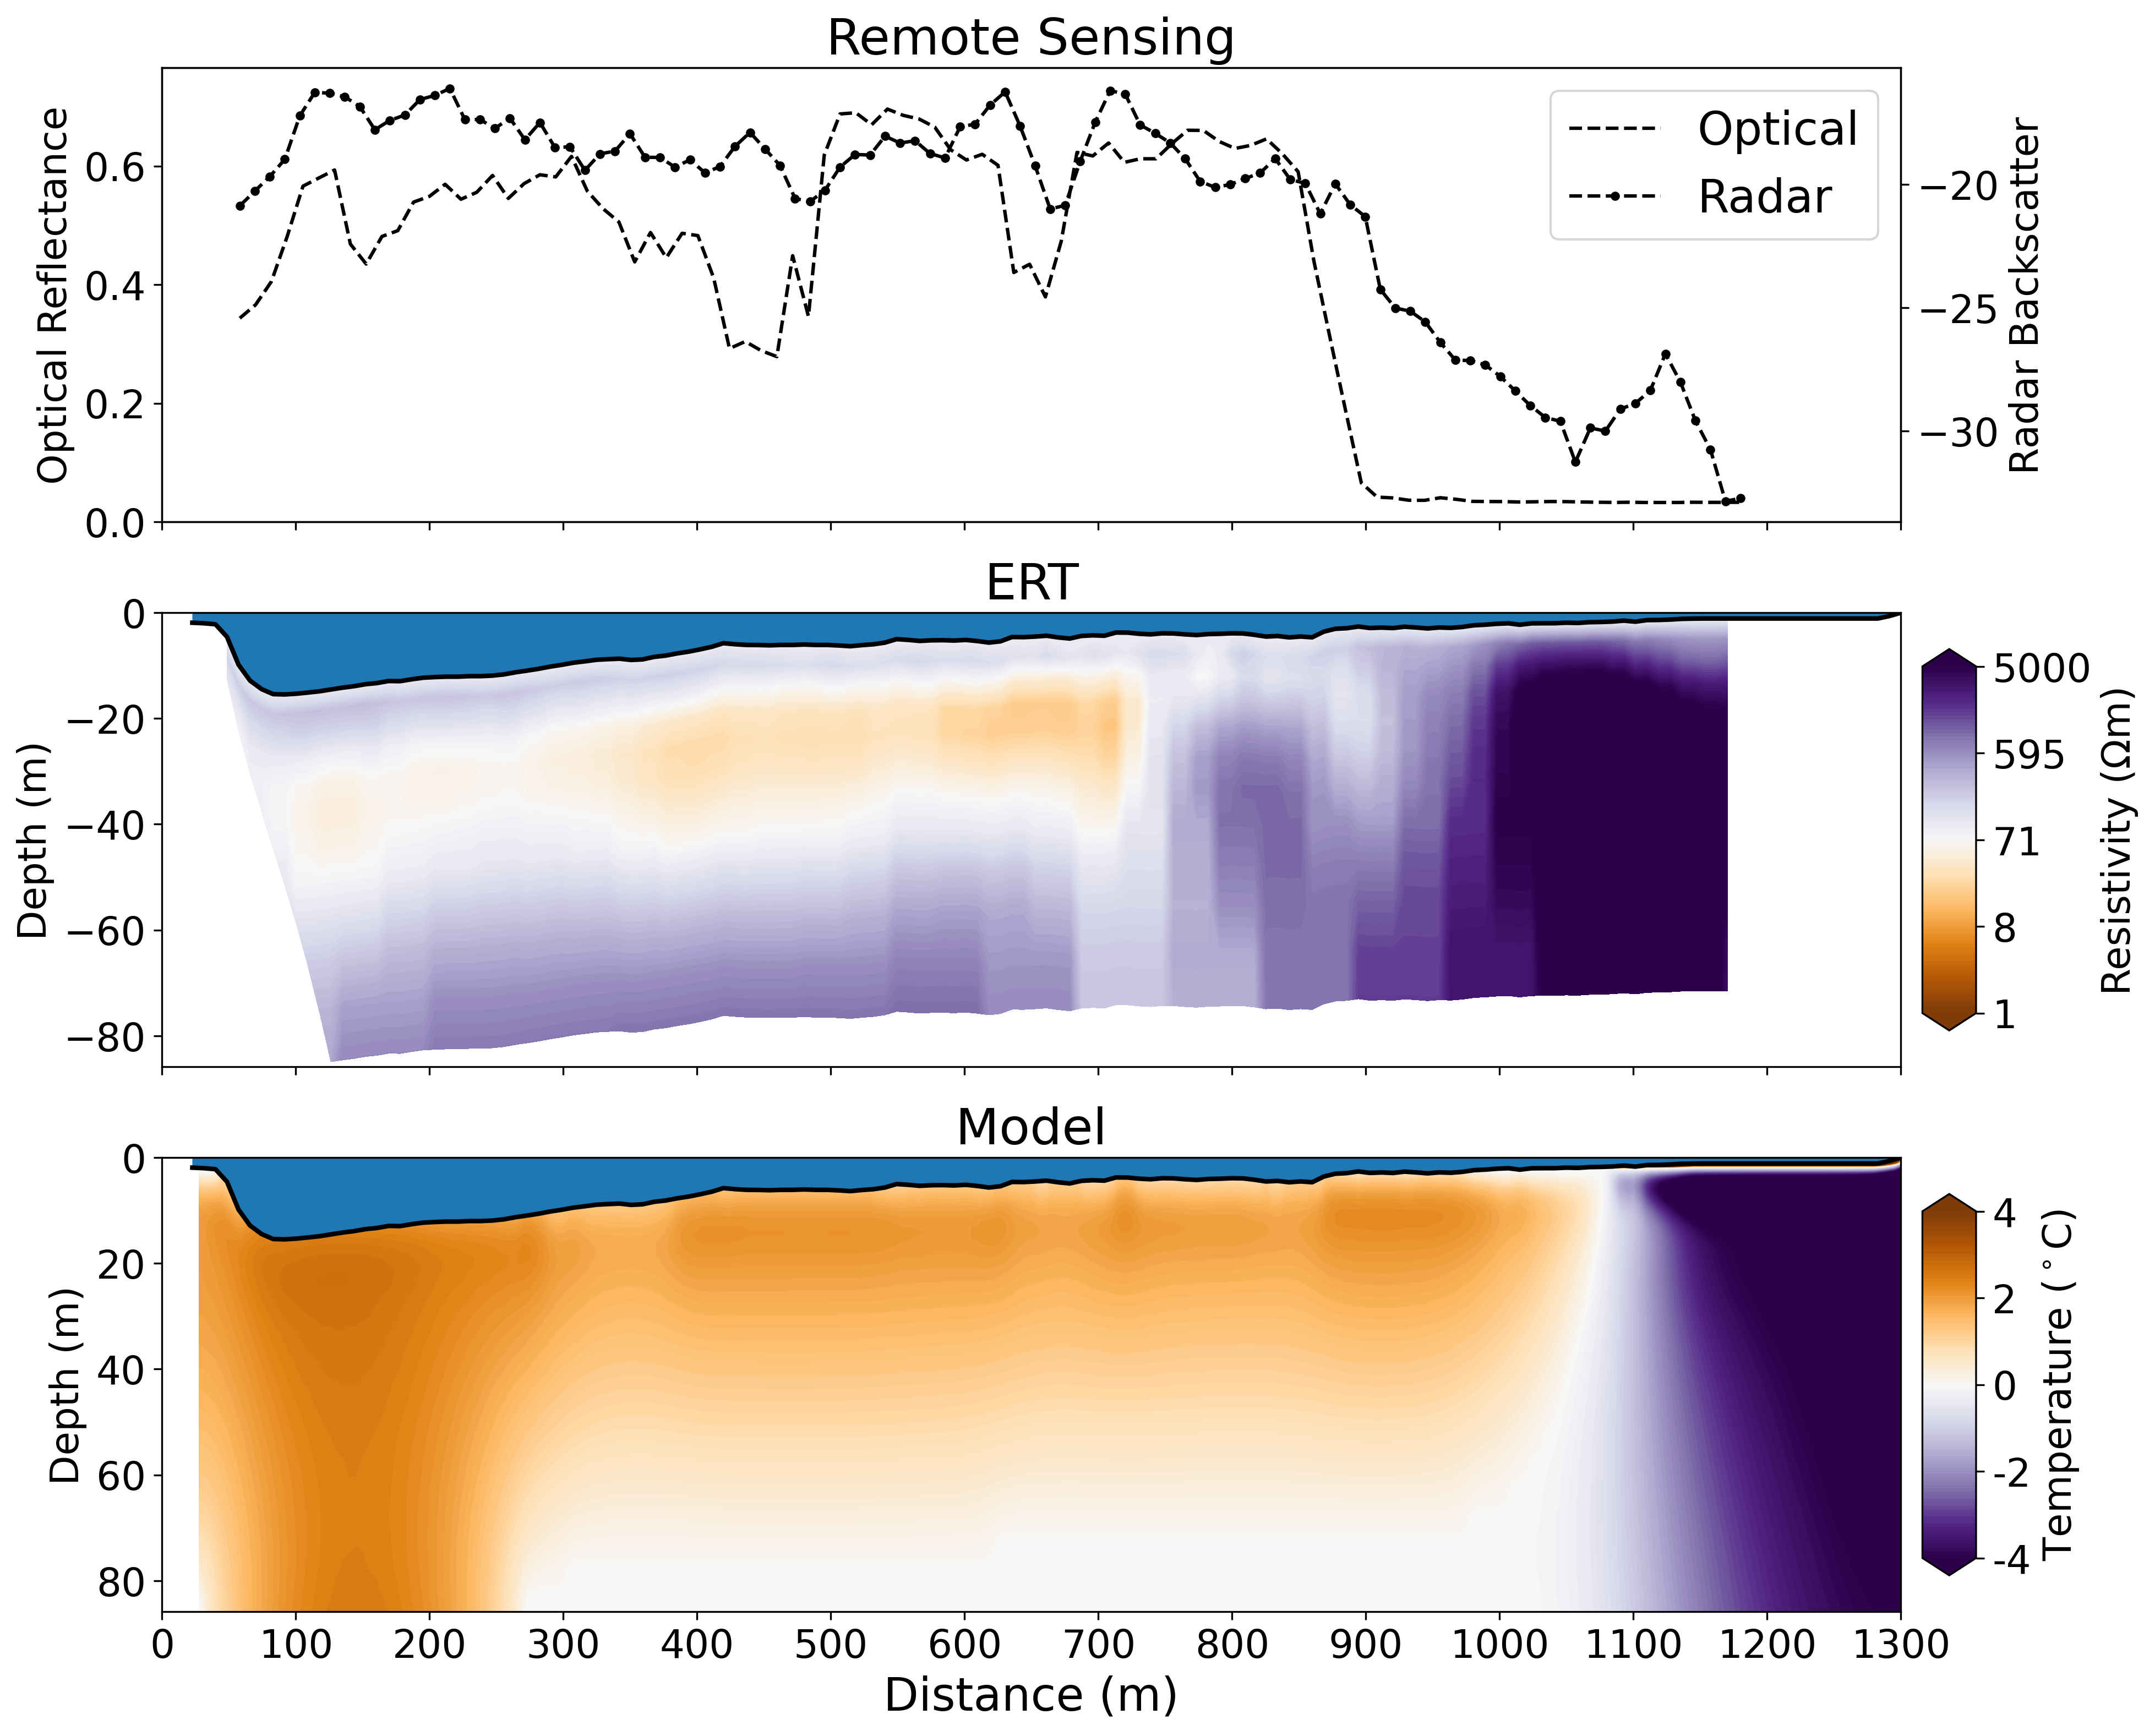

In [69]:
ERT = readERT(PathERT, "2_C")
RS = readRS(PathRS, "2_C")
Model = readMODEL(PathModel, "ECR_5")

f, (( ax0, ax1, ax2 )) = plt.subplots(3, 1,figsize=(13,11), dpi=300,sharex =True)

### Optical RS ###
ax0.set_title("Remote Sensing", fontsize=22)
ax0.plot(np.array(RS[0])[::-1]+120,np.array(RS[1])/10000, "k--", label="Optical")
ax0.plot(-10000, 0.3, "k.--", label="Radar")
ax0.set_ylabel("Optical Reflectance", c= "k", fontsize=17)
ax0.set_xticks([])
ax0.tick_params(axis='both', which='major', labelsize=17)
ax0.legend(loc=1, fontsize=20)
ax0.set_ylim(0,np.nanmax(np.array(RS[1])/10000) + (np.nanmax(np.array(RS[1])/10000)*0.1))
#ax0.text(0, np.nanmax(np.array(RS[1])/10000)+0.05, "A", fontsize=30)
#ax0.invert_xaxis()
#ax0.text(1750-35, np.nanmax(np.array(RS[1])/10000)+0.05, "A'", fontsize=30)

### Radar RS ###
ax0a = ax0.twinx()
ax0a.plot(np.array(RS[2])[::-1]+120,RS[3], "k.--", label="Radar")
ax0a.set_ylabel("Radar Backscatter", c= "k", fontsize=17)
ax0a.tick_params(axis='both', which='major', labelsize=17)
ax0a.invert_xaxis()

### Bathymetry Line ####
#ax0b = ax0.twinx()
#ax0b.plot(d_row[0], bathy, "k-")



####### ERT #######
ax1.set_title("ERT", fontsize=22)
cmap = mpl.cm.PuOr

min_v= np.log(1)
max_v= np.log(5000)
levels= np.linspace(min_v,max_v,100)

pcm = ax1.contourf(ERT[0], ERT[1], np.log(ERT[2]),
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')
cbaxes = f.add_axes([0.89, 0.4, 0.025, 0.21])
cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=np.linspace(min_v, max_v, 5) )#ticks=ticks
cb.ax.set_yticklabels([str(int(round(np.exp(x), 0))) for x in np.linspace(min_v, max_v, 5)], fontsize=17)
cb.set_label("Resistivity (\u03A9m)", fontsize=17)

ax1.plot(ERT[3], ERT[4], "k-", lw=2)
ax1.fill_between(ERT[3], [0 for i in ERT[3]], ERT[4], "grey")

#ax1.set_xlim(-20,1800)
#ax1.invert_yaxis()
ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.set_xticks([])
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax1.invert_xaxis()


######## MODEL ######
ax2.set_title("Model", fontsize=22)
min_v= -4.
max_v= 4.
levels= np.linspace(min_v,max_v,100)
cmap = mpl.cm.PuOr_r

pcm = ax2.contourf(Model[0], Model[1], Model[2],
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')

cbaxes = f.add_axes([0.89, 0.1, 0.025, 0.21]) 

cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=[-4, -2, 0, 2, 4] )
cb.ax.set_yticklabels([ -4, -2, 0, 2, 4], fontsize=17)
cb.set_label("Temperature ($^\circ$C)", fontsize=17)

ax2.plot(ERT[3], np.array(ERT[4])*-1, "k-", lw=2)
ax2.fill_between(ERT[3], [0 for i in ERT[3]], np.array(ERT[4])*-1, "grey")

ax2.set_xlabel("Distance (m)", fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.invert_yaxis()
#ax2.set_ylim(np.nanmax(ERT[1]), 0)
ax2.set_ylim(np.nanmin(ERT[1])*-1, 0)
ax2.invert_xaxis()

lenght = 1300
spcing = lenght / 100 + 1
ax2.set_xlim(1300,0)
ax2.xaxis.set_ticks(np.linspace(lenght, 0, int(spcing)))
ax2.set_xticklabels(list(map(int, np.linspace(0, lenght, int(spcing)))))

##############################################

ax2.set_xlim(1300,0)
plt.gcf().subplots_adjust(left=0.07, right=0.88, bottom=0.08, top = 0.93)
plt.savefig(PathFigExport + "Profile_2C.png", dpi=300)

plt.show()

# Profile 3A

In [108]:
ERT = readERT(PathERT, "3_A")
RS = readRS(PathRS, "3_A")
Model = readMODEL(PathModel, "ECR_6")

f, (( ax0, ax1, ax2 )) = plt.subplots(3, 1,figsize=(13,11), dpi=300,sharex =True)

### Optical RS ###
ax0.set_title("Remote Sensing", fontsize=22)
#ax0.plot(RS[0][::-1],np.array(RS[1])/10000, "k--", label="Optical")
ax0.plot(-10000, 0.3, "k.--", label="Radar")
#ax0.set_ylabel("Optical Reflectance", c= "k", fontsize=17)
ax0.set_yticks([])
ax0.set_xticks([])
ax0.tick_params(axis='both', which='major', labelsize=17)
ax0.legend(loc=1, fontsize=20)
ax0.set_ylim(0,np.nanmax(np.array(RS[1])/10000) + (np.nanmax(np.array(RS[1])/10000)*0.1))
#ax0.text(0, np.nanmax(np.array(RS[1])/10000)+0.05, "A", fontsize=30)
#ax0.invert_xaxis()
#ax0.text(1750-35, np.nanmax(np.array(RS[1])/10000)+0.05, "A'", fontsize=30)

### Radar RS ###
ax0a = ax0.twinx()
ax0a.plot(np.array(RS[2])[::-1],RS[3], "k.--", label="Radar")
ax0a.set_ylabel("Radar Backscatter", c= "k", fontsize=17)
ax0a.tick_params(axis='both', which='major', labelsize=17)
ax0a.invert_xaxis()

### Bathymetry Line ####
#ax0b = ax0.twinx()
#ax0b.plot(d_row[0], bathy, "k-")



####### ERT #######
ax1.set_title("ERT", fontsize=22)
cmap = mpl.cm.PuOr

min_v= np.log(1)
max_v= np.log(5000)
levels= np.linspace(min_v,max_v,100)

pcm = ax1.contourf(ERT[0], ERT[1], np.log(ERT[2]),
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')
cbaxes = f.add_axes([0.89, 0.4, 0.025, 0.21])
cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=np.linspace(min_v, max_v, 5) )#ticks=ticks
cb.ax.set_yticklabels([str(int(round(np.exp(x), 0))) for x in np.linspace(min_v, max_v, 5)], fontsize=17)
cb.set_label("Resistivity (\u03A9m)", fontsize=17)

ax1.plot(ERT[3], ERT[4], "k-", lw=2)

zeroline = []
for i, e in enumerate(ERT[3]):
    if ERT[4][i]<0:
        zeroline.append(0)
    else:
        zeroline.append(ERT[4][i])

ax1.fill_between(ERT[3], zeroline, ERT[4], "grey")

#ax1.set_xlim(-20,1800)
#ax1.invert_yaxis()
ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.set_xticks([])
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax1.invert_xaxis()



######## MODEL ######
ax2.set_title("Model", fontsize=22)
min_v= -4.
max_v= 4.
levels= np.linspace(min_v,max_v,100)
cmap = mpl.cm.PuOr_r

pcm = ax2.contourf(Model[0], Model[1], np.where(Model[1]>0, Model[2], np.nan),
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')

cbaxes = f.add_axes([0.89, 0.1, 0.025, 0.21]) 

cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=[-4, -2, 0, 2, 4] )
cb.ax.set_yticklabels([ -4, -2, 0, 2, 4], fontsize=17)
cb.set_label("Temperature ($^\circ$C)", fontsize=17)

ax2.plot(ERT[3], np.array(ERT[4])*-1, "k-", lw=2)
zeroline = []
for i, e in enumerate(ERT[3]):
    if ERT[4][i]<0:
        zeroline.append(0)
    else:
        zeroline.append(ERT[4][i]*-1)

ax2.fill_between(ERT[3], zeroline, np.array(ERT[4])*-1, "grey")

ax2.set_xlabel("Distance (m)", fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.invert_yaxis()
#ax2.set_ylim(np.nanmax(ERT[1]), 0)
ax2.set_ylim(np.nanmin(ERT[1])*-1, np.nanmax(ERT[1])*-1)
ax2.invert_xaxis()

lenght = 900
spcing = lenght / 100 + 1
ax2.set_xlim(900,0)
ax2.xaxis.set_ticks(np.linspace(lenght, 0, int(spcing)))
ax2.set_xticklabels(list(map(int, np.linspace(0, lenght, int(spcing)))))

##############################################

#x2.set_xlim(950,0)
plt.gcf().subplots_adjust(left=0.07, right=0.88, bottom=0.08, top = 0.93)
plt.savefig(PathFigExport + "Profile_3A.png", dpi=300)

plt.show()

/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/SerpChan/_data/3_ERT/cropped/3_A_ERT_Distance.csv
RS has no optical data, filling both arrays with radar
184


# Profile 3B

In [106]:
ERT = readERT(PathERT, "3_B")
RS = readRS(PathRS, "3_B")
Model = readMODEL(PathModel, "ECR_7")

f, (( ax0, ax1, ax2 )) = plt.subplots(3, 1,figsize=(13,11), dpi=300,sharex =True)

### Optical RS ###
ax0.set_title("Remote Sensing", fontsize=22)
#ax0.plot(RS[0][::-1],np.array(RS[1])/10000, "k--", label="Optical")
ax0.plot(-10000, 0.3, "k.--", label="Radar")
#ax0.set_ylabel("Optical Reflectance", c= "k", fontsize=17)
ax0.set_xticks([])
ax0.set_yticks([])
ax0.tick_params(axis='both', which='major', labelsize=17)
ax0.legend(loc=1, fontsize=20)
ax0.set_ylim(0,np.nanmax(np.array(RS[1])/10000) + (np.nanmax(np.array(RS[1])/10000)*0.1))
#ax0.text(0, np.nanmax(np.array(RS[1])/10000)+0.05, "A", fontsize=30)
#ax0.invert_xaxis()
#ax0.text(1750-35, np.nanmax(np.array(RS[1])/10000)+0.05, "A'", fontsize=30)

### Radar RS ###
ax0a = ax0.twinx()
ax0a.plot(np.array(RS[2][::-1]),RS[3], "k.--", label="Radar")
ax0a.set_ylabel("Radar Backscatter", c= "k", fontsize=17)
ax0a.tick_params(axis='both', which='major', labelsize=17)
#ax0a.invert_xaxis()

### Bathymetry Line ####
#ax0b = ax0.twinx()
#ax0b.plot(d_row[0], bathy, "k-")



####### ERT #######
ax1.set_title("ERT", fontsize=22)
cmap = mpl.cm.PuOr

min_v= np.log(1)
max_v= np.log(5000)
levels= np.linspace(min_v,max_v,100)



pcm = ax1.contourf(ERT[0], ERT[1], np.log(ERT[2]),
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')
cbaxes = f.add_axes([0.89, 0.4, 0.025, 0.21])
cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=np.linspace(min_v, max_v, 5) )#ticks=ticks
cb.ax.set_yticklabels([str(int(round(np.exp(x), 0))) for x in np.linspace(min_v, max_v, 5)], fontsize=17)
cb.set_label("Resistivity (\u03A9m)", fontsize=17)

ax1.plot(ERT[3], ERT[4], "k-", lw=2)

zeroline = []
for i, e in enumerate(ERT[3]):
    if ERT[4][i]<0:
        zeroline.append(0)
    else:
        zeroline.append(ERT[4][i])

ax1.fill_between(ERT[3],zeroline, ERT[4], "grey")

#ax1.set_xlim(-20,1800)
#ax1.invert_yaxis()
ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.set_xticks([])
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel("Depth (m)", c= "k", fontsize=17)
#ax1.invert_xaxis()



######## MODEL ######
ax2.set_title("Model", fontsize=22)
min_v= -4.
max_v= 4.
levels= np.linspace(min_v,max_v,100)
cmap = mpl.cm.PuOr_r

#np.where(Model[1]>0, Model[2], np.nan)

pcm = ax2.contourf(Model[0], Model[1], np.where(Model[1]>0, Model[2], np.nan),
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')

cbaxes = f.add_axes([0.89, 0.1, 0.025, 0.21]) 

cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=[-4, -2, 0, 2, 4] )
cb.ax.set_yticklabels([ -4, -2, 0, 2, 4], fontsize=17)
cb.set_label("Temperature ($^\circ$C)", fontsize=17)

ax2.plot(ERT[3], np.array(ERT[4])*-1, "k-", lw=2)

zeroline = []
for i, e in enumerate(ERT[3]):
    if ERT[4][i]<0:
        zeroline.append(0)
    else:
        zeroline.append(ERT[4][i]*-1)

ax2.fill_between(ERT[3], zeroline, np.array(ERT[4])*-1, "grey")

ax2.set_xlabel("Distance (m)", fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.invert_yaxis()
#ax2.set_ylim(np.nanmax(ERT[1]), 0)
ax2.set_ylim(np.nanmin(ERT[1])*-1, np.nanmax(ERT[1])*-1)
#ax2.invert_xaxis()

lenght = 1300
spcing = lenght / 100 + 1
ax2.set_xlim( 0, 1300)
ax2.xaxis.set_ticks(np.linspace(0, lenght, int(spcing)))
ax2.set_xticklabels(list(map(int, np.linspace(0 , lenght, int(spcing)))))

##############################################

#ax2.set_xlim(900,0)
plt.gcf().subplots_adjust(left=0.07, right=0.88, bottom=0.08, top = 0.93)
plt.savefig(PathFigExport + "Profile_3B.png", dpi=300)

plt.show()

/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/SerpChan/_data/3_ERT/cropped/3_B_ERT_Distance.csv
RS has no optical data, filling both arrays with radar
259
